In [1]:
from __future__ import print_function, absolute_import
import random
from collections import OrderedDict
from numba import njit
from numba import int32, deferred_type, optional, types
from numba import jitclass
from numba.typed import List
from numba import njit, typeof, typed, types
import numpy as np
import numba as nb


In [2]:
import numpy as np
featureExample = [[210,  13,  80, 128, 155, 224,  72, 120, 234, 104,  92,  75, 232, 141, 216, 238,  34, 172,
 198, 218, 191, 113, 205, 136,  88, 150, 203,  57, 204,  91, 129,  83],[210,  13,  80, 128, 155, 224,  72, 120, 234, 104,  92,  75, 232, 141, 216, 238,  34, 172,
 198, 218, 191, 113, 205, 136,  88, 150, 203,  57, 204,  91, 129,  83]]

In [3]:
#load model
import pickle
model = None
with open('visionModel.pickle', 'rb') as handle:
    model = pickle.load(handle)

@njit
def hammingVector(stack1, stack2):
    return (stack1 != stack2).sum(axis=1)

In [4]:
#load data into JIT class
@njit
def compareLevelData(levelData, vec, metric=hammingVector):
    lenLevelData = levelData.shape[0]
    print(levelData, levelData.shape)
    lenFeature = levelData.shape[1]
    testColumn = np.zeros(shape=(lenLevelData, lenFeature), dtype=levelData.dtype)
    for i in range(0, lenLevelData):
        testColumn[i] = vec
        pairwiseDistance =  metric(levelData, vec)
        minIndex = np.argmin(pairwiseDistance)
    return np.argmin(pairwiseDistance)

class VisionModelPacker:
    def __init__(self, filename=None):
        if filename is not None:
            self.loadModel(filename)
            self.packVisionModelEvaluator()
        else:
            self.fileModel = None
    def loadModel(self, filename):
        with open('visionModel.pickle', 'rb') as handle:
            self.fileModel = pickle.load(handle)
    def packVisionModelEvaluator(self, featureExample = [[1],[1]]):
        if self.fileModel is None:
            print("Please load a model first")
        else:
            #define compute model
            self.computeModel = {} 
            self.computeModel["wordWeight"] = typed.Dict.empty(
                key_type=types.string,
                value_type=types.float64,
            )
            self.computeModel["wordIndex"] = typed.Dict.empty(
                key_type=types.string,
                value_type=types.int64,
            )
            featureExample2 = np.asarray(featureExample)
            typeofFeatureExample2 = typeof(featureExample2)
            self.computeModel["data"] = typed.Dict.empty(
                key_type=types.string,
                value_type=typeofFeatureExample2,
            )
            self.computeModel["children"] = typed.Dict.empty(
                key_type=types.string,
                value_type=nb.types.ListType(types.string),
            )
            
            self.computeModel["intUnicodeMap"] = typed.Dict.empty(
                key_type=types.int64,
                value_type=types.string,
            )
            
            self.computeModel["intUnicodeMap"][0] = "0"
            self.computeModel["intUnicodeMap"][1] = "1"
            self.computeModel["intUnicodeMap"][2] = "2"
            self.computeModel["intUnicodeMap"][3] = "3"
            self.computeModel["intUnicodeMap"][4] = "4"
            self.computeModel["intUnicodeMap"][5] = "5"
            self.computeModel["intUnicodeMap"][6] = "6"
            self.computeModel["intUnicodeMap"][7] = "7"
            self.computeModel["intUnicodeMap"][8] = "8"
            self.computeModel["intUnicodeMap"][9] = "9"
            self.computeModel["intUnicodeMap"][10] = "10"
            self.computeModel["intUnicodeMap"][11] = "11"
            self.computeModel["intUnicodeMap"][12] = "12"
            self.computeModel["intUnicodeMap"][13] = "13"
            self.computeModel["intUnicodeMap"][14] = "14"
            self.computeModel["intUnicodeMap"][15] = "15"
            self.computeModel["intUnicodeMap"][16] = "16"
            self.computeModel["intUnicodeMap"][17] = "17"
            self.computeModel["intUnicodeMap"][18] = "18"
            self.computeModel["intUnicodeMap"][19] = "19"
            self.computeModel["intUnicodeMap"][20] = "20"
            self.computeModel["intUnicodeMap"][21] = "21"
            self.computeModel["intUnicodeMap"][22] = "22"
            self.computeModel["intUnicodeMap"][23] = "23"
            self.computeModel["intUnicodeMap"][24] = "24"
            self.computeModel["intUnicodeMap"][25] = "25"
            self.computeModel["intUnicodeMap"][26] = "26"
            self.computeModel["intUnicodeMap"][27] = "27"
            self.computeModel["intUnicodeMap"][28] = "28"
            self.computeModel["intUnicodeMap"][29] = "29"
            self.computeModel["intUnicodeMap"][30] = "30"
            self.computeModel["intUnicodeMap"][31] = "31"
            self.computeModel["intUnicodeMap"][32] = "32"
            self.computeModel["intUnicodeMap"][33] = "33"
            self.computeModel["intUnicodeMap"][34] = "34"
            self.computeModel["intUnicodeMap"][35] = "35"
            self.computeModel["intUnicodeMap"][36] = "36"
            self.computeModel["intUnicodeMap"][37] = "37"
            self.computeModel["intUnicodeMap"][38] = "38"
            self.computeModel["intUnicodeMap"][39] = "39"
            self.computeModel["intUnicodeMap"][40] = "40"
            self.computeModel["intUnicodeMap"][41] = "41"
            self.computeModel["intUnicodeMap"][42] = "42"
            self.computeModel["intUnicodeMap"][43] = "43"
            self.computeModel["intUnicodeMap"][44] = "44"
            self.computeModel["intUnicodeMap"][45] = "45"
            self.computeModel["intUnicodeMap"][46] = "46"
            self.computeModel["intUnicodeMap"][47] = "47"
            self.computeModel["intUnicodeMap"][48] = "48"
            self.computeModel["intUnicodeMap"][49] = "49"
            self.computeModel["intUnicodeMap"][50] = "50"
            self.computeModel["intUnicodeMap"][51] = "51"
            self.computeModel["intUnicodeMap"][52] = "52"
            self.computeModel["intUnicodeMap"][53] = "53"
            self.computeModel["intUnicodeMap"][54] = "54"
            self.computeModel["intUnicodeMap"][55] = "55"
            self.computeModel["intUnicodeMap"][56] = "56"
            self.computeModel["intUnicodeMap"][57] = "57"
            self.computeModel["intUnicodeMap"][58] = "58"
            self.computeModel["intUnicodeMap"][59] = "59"
            self.computeModel["intUnicodeMap"][60] = "60"
            self.computeModel["intUnicodeMap"][61] = "61"
            self.computeModel["intUnicodeMap"][62] = "62"
            self.computeModel["intUnicodeMap"][63] = "63"
            self.computeModel["intUnicodeMap"][64] = "64"
            self.computeModel["intUnicodeMap"][65] = "65"
            self.computeModel["intUnicodeMap"][66] = "66"
            self.computeModel["intUnicodeMap"][67] = "67"
            self.computeModel["intUnicodeMap"][68] = "68"
            self.computeModel["intUnicodeMap"][69] = "69"
            self.computeModel["intUnicodeMap"][70] = "70"
            self.computeModel["intUnicodeMap"][71] = "71"
            self.computeModel["intUnicodeMap"][72] = "72"
            self.computeModel["intUnicodeMap"][73] = "73"
            self.computeModel["intUnicodeMap"][74] = "74"
            self.computeModel["intUnicodeMap"][75] = "75"
            self.computeModel["intUnicodeMap"][76] = "76"
            self.computeModel["intUnicodeMap"][77] = "77"
            self.computeModel["intUnicodeMap"][78] = "78"
            self.computeModel["intUnicodeMap"][79] = "79"
            self.computeModel["intUnicodeMap"][80] = "80"
            self.computeModel["intUnicodeMap"][81] = "81"
            self.computeModel["intUnicodeMap"][82] = "82"
            self.computeModel["intUnicodeMap"][83] = "83"
            self.computeModel["intUnicodeMap"][84] = "84"
            self.computeModel["intUnicodeMap"][85] = "85"
            self.computeModel["intUnicodeMap"][86] = "86"
            self.computeModel["intUnicodeMap"][87] = "87"
            self.computeModel["intUnicodeMap"][88] = "88"
            self.computeModel["intUnicodeMap"][89] = "89"
            self.computeModel["intUnicodeMap"][90] = "90"
            self.computeModel["intUnicodeMap"][91] = "91"
            self.computeModel["intUnicodeMap"][92] = "92"
            self.computeModel["intUnicodeMap"][93] = "93"
            self.computeModel["intUnicodeMap"][94] = "94"
            self.computeModel["intUnicodeMap"][95] = "95"
            self.computeModel["intUnicodeMap"][96] = "96"
            self.computeModel["intUnicodeMap"][97] = "97"
            self.computeModel["intUnicodeMap"][98] = "98"
            self.computeModel["intUnicodeMap"][99] = "99"
            self.computeModel["intUnicodeMap"][100] = "100"
            self.computeModel["intUnicodeMap"][101] = "101"
            self.computeModel["intUnicodeMap"][102] = "102"
            self.computeModel["intUnicodeMap"][103] = "103"
            self.computeModel["intUnicodeMap"][104] = "104"
            self.computeModel["intUnicodeMap"][105] = "105"
            self.computeModel["intUnicodeMap"][106] = "106"
            self.computeModel["intUnicodeMap"][107] = "107"
            self.computeModel["intUnicodeMap"][108] = "108"
            self.computeModel["intUnicodeMap"][109] = "109"
            print(self.computeModel)
    
            #define a jit compute instance with this model
            specs_model = {}
            specs_model['wordWeight'] =self.computeModel["wordWeight"]._dict_type
            specs_model['wordIndex'] = self.computeModel["wordIndex"]._dict_type
            specs_model['data'] = self.computeModel["data"]._dict_type
            specs_model['children'] = self.computeModel["children"]._dict_type
            specs_model['intUnicodeMap'] = self.computeModel["intUnicodeMap"]._dict_type
            specs_model['bowSize'] = types.int64
            @nb.jitclass(specs_model)
            class VisionModelEvaluator:
                def getEmptyIntList(self):
                    l = List()
                    l.append(12)
                    l.clear()
                    return l
                
                def getPhrase(self, vecStack):
                    numberOfVecs = vecStack.shape[0]
                    outBowPhrase = np.zeros(shape=(1, self.bowSize), dtype=types.float64)
                    for i in range(numberOfVecs):
                        _vec = np.zeros(shape=(vecStack.shape[1]), dtype=vecStack.dtype)
                        _vec = vecStack[i]
                        wordId = self.getWordId(_vec)
                        #get weight
                        wordWeight = 1
                        if wordId in self.wordWeight:
                            wordWeight = self.wordWeight[wordId]
                        #get vector
                        wordIndex = self.wordIndex[wordId]
                        word = np.zeros(shape=(1, self.bowSize), dtype=types.float64)
                        word[0][wordIndex] = wordWeight
                        outBowPhrase = outBowPhrase + word
                    sumBow = np.sum(outBowPhrase) # jk fixme todo
                    #print("sumBow", sumBow)
                    bowVec = outBowPhrase / sumBow
                    return bowVec
                
                def getPhraseDistance(self, v1, v2):
                    return 1 - (0.5 * np.sum((v1/np.sum(v1))-(v2/np.sum(v2))))
                
                def getWordId(self, vec, above = None):
                    above = self.getEmptyIntList()
                    entryPoint = "root"
                    while (True):       
                        if entryPoint not in self.data:
                            return entryPoint
                        levelData = self.data[entryPoint]
                        _lenLevelData = levelData.shape[0]
                        _lenFeature = levelData.shape[1]
                        testColumn = np.zeros(shape=(_lenLevelData, _lenFeature), dtype=levelData.dtype)
                        for i in range(0, _lenLevelData):
                            testColumn[i] = vec
                        pairwiseDistance =  (testColumn != levelData).sum(axis=1)
                        bestChild = np.argmin(pairwiseDistance)
                        above.append(bestChild)
                        bestChildId = ""
                        lenAbove = len(above)
                        for i in range(lenAbove):
                            if (i + 1 == lenAbove):
                                bestChildId = bestChildId + self.intUnicodeMap[above[i]]
                            else:
                                bestChildId = bestChildId + self.intUnicodeMap[above[i]] + "-"
                        entryPoint = bestChildId 
            

    
                def __init__(self, wordWeight, wordIndex, data, _children, intUnicodeMap, bowSize):
                    self.wordWeight = wordWeight
                    self.wordIndex = wordIndex
                    self.data = data
                    self.children = _children
                    self.intUnicodeMap = intUnicodeMap
                    self.bowSize = bowSize
    
            # load the computeModel from the fileModel
            wordWeights = self.fileModel["wordWeights"]
            wordWeightKeys = wordWeights.keys()
            for wordWeightKey in wordWeightKeys:
                self.computeModel["wordWeight"][wordWeightKey] = wordWeights[wordWeightKey]

            wordIndex = self.fileModel["wordIndex"]
            wordIndexKeys = wordIndex.keys()
            for wordIndexKey in wordIndexKeys:
                self.computeModel["wordIndex"][wordIndexKey] = wordIndex[wordIndexKey]
                
            childrenMap = self.fileModel["children"]
            childrenMapKeys = childrenMap.keys()
            for childMapKey in childrenMapKeys:
                listOfChildren = List()
                for child in childrenMap[childMapKey]:
                    listOfChildren.append(child)
                self.computeModel["children"][childMapKey] = listOfChildren

            data = self.fileModel["data"]
            dataKeys = data.keys()
            for dataKey in dataKeys:
                point = np.asarray(data[dataKey])
                if point.shape[0] != 0:
                    self.computeModel["data"][dataKey] = point
            visionModelEvalInstance = VisionModelEvaluator(
                self.computeModel["wordWeight"], 
                self.computeModel["wordIndex"],
                self.computeModel["data"],
                self.computeModel["children"],
                self.computeModel["intUnicodeMap"],
                len(wordIndexKeys)
            )
            self.engine = visionModelEvalInstance
a = VisionModelPacker('visionModel.pickle')
a.engine
a.engine.getWordId

{'wordWeight': DictType[unicode_type,float64]({}), 'wordIndex': DictType[unicode_type,int64]({}), 'data': DictType[unicode_type,array(int64, 2d, C)]({}), 'children': DictType[unicode_type,ListType[unicode_type]]({}), 'intUnicodeMap': DictType[int64,unicode_type]({0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33, 34: 34, 35: 35, 36: 36, 37: 37, 38: 38, 39: 39, 40: 40, 41: 41, 42: 42, 43: 43, 44: 44, 45: 45, 46: 46, 47: 47, 48: 48, 49: 49, 50: 50, 51: 51, 52: 52, 53: 53, 54: 54, 55: 55, 56: 56, 57: 57, 58: 58, 59: 59, 60: 60, 61: 61, 62: 62, 63: 63, 64: 64, 65: 65, 66: 66, 67: 67, 68: 68, 69: 69, 70: 70, 71: 71, 72: 72, 73: 73, 74: 74, 75: 75, 76: 76, 77: 77, 78: 78, 79: 79, 80: 80, 81: 81, 82: 82, 83: 83, 84: 84, 85: 85, 86: 86, 87: 87, 88: 88, 89: 89, 90: 90, 91: 91, 92: 92, 93: 93, 94: 

<bound method VisionModelPacker.packVisionModelEvaluator.<locals>.VisionModelEvaluator.getWordId of <numba.jitclass.boxing.VisionModelEvaluator object at 0x7ffae32433b0>>

In [5]:
test = np.asarray(a.fileModel["data"]["root"][0])

In [6]:
%time
a.engine.getWordId(test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs


'0-4-8'

In [7]:
import cv2 #open computer vision
from matplotlib import pyplot as plt #plotting library
if 'cap' not in globals():
    cap = cv2.VideoCapture(0)

#Init orb feature detector/computer
if 'orb' not in globals():
    orb = cv2.ORB_create(edgeThreshold=2, patchSize=100, nlevels=15, fastThreshold=8, nfeatures=1000000, scoreType=cv2.ORB_FAST_SCORE, firstLevel=0)

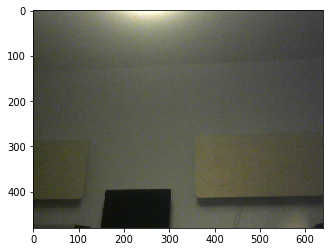

In [8]:
#rep from here
ret, input_image = cap.read() 
plt.imshow(input_image[:,:,::-1]) #[:,:,::-1] converts BGR to RGB

In [9]:
#Detect and compute orb keypoints and keypoint descriptors from input image.
kp1, des1 = orb.detectAndCompute(input_image, None)
#draw keypoints onto image 
output_image = cv2.drawKeypoints(input_image,kp1,color=(0,255,0), outImage=None, flags=0)
des1.shape

(197, 32)

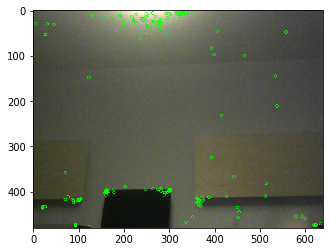

In [10]:
#plot result
plt.imshow(output_image[:,:,::-1])

In [11]:
%time
out = a.engine.getPhrase(des1)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.53 µs


In [12]:
np.count_nonzero(out)

150

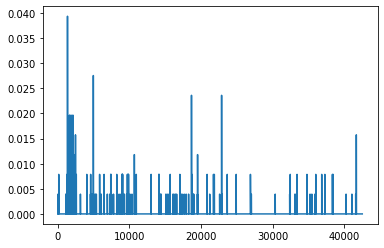

In [13]:
def plotPhrase(phrase):
    lenFeatures = phrase.shape[1]
    x = []
    y = []
    for i in range(lenFeatures):
        y.append(phrase[0][i])
        x.append(i)
    plt.plot(x, y)
plotPhrase(out)

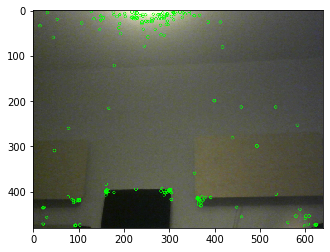

In [14]:
ret, input_image = cap.read() 
kp1, des1 = orb.detectAndCompute(input_image, None)
output_image = cv2.drawKeypoints(input_image,kp1,color=(0,255,0), outImage=None, flags=0)
plt.imshow(output_image[:,:,::-1])

0.9999999999999982

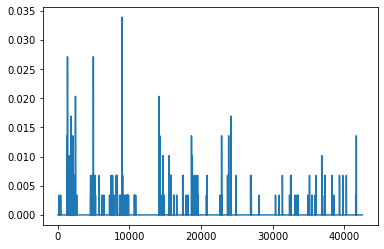

In [15]:

out = a.engine.getPhrase(des1)
plotPhrase(out)
np.sum(out)

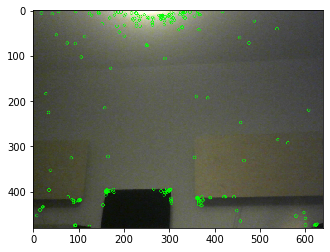

In [16]:
ret, input_image = cap.read() 
kp1, des1 = orb.detectAndCompute(input_image, None)
output_image = cv2.drawKeypoints(input_image,kp1,color=(0,255,0), outImage=None, flags=0)
plt.imshow(output_image[:,:,::-1])


0.9999999999999981

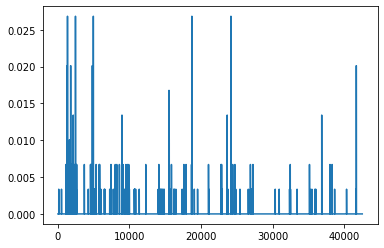

In [17]:
out = a.engine.getPhrase(des1)
plotPhrase(out)
np.sum(out)

In [18]:
from matplotlib import gridspec
def getFrameAndComputePhrase(computeEngine, cap):
    cap.release()
    cap = cv2.VideoCapture(0)
    ret, input_img = cap.read() 
    _kp1, _des1 = orb.detectAndCompute(input_img, None)
    _frameWithFeatures = cv2.drawKeypoints(input_img,kp1,color=(0,255,0), outImage=None, flags=0)
    phrase = computeEngine.getPhrase(_des1)
    lenFeatures = phrase.shape[1]
    _x = []
    _y = []
    for i in range(lenFeatures):
        _x.append(phrase[0][i])
        _y.append(i)
    _fig, _axs = plt.subplots(2)
    _axs[0].imshow(_frameWithFeatures[:,:,::-1])
    _axs[1].plot(_x, _y)
    return phrase

102
(1, 42548)
(102,)


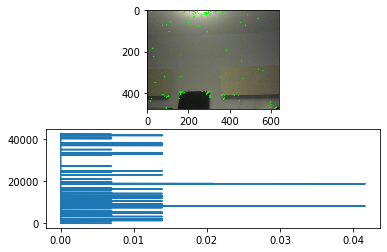

In [24]:
phrase1 = getFrameAndComputePhrase(a.engine, cap)
print(np.count_nonzero(phrase1))
print(phrase1.shape)
print(phrase1[phrase1!=0].shape)

94
(1, 42548)
(102,)


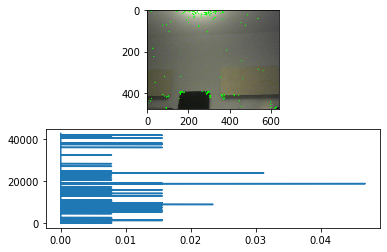

In [27]:
phrase2 = getFrameAndComputePhrase(a.engine, cap)
print(np.count_nonzero(phrase2))
print(phrase2.shape)
print(phrase2[phrase1!=0].shape)

In [23]:
#distance of phrases
print(np.count_nonzero(phrase1 - phrase1))
print(a.engine.getPhraseDistance(phrase1, phrase2))

0
0.9999999999999997
